In [9]:
!pip install pennylane --upgrade
import numpy as np
import pennylane as qml
import matplotlib.pyplot as plt



# **Introduction to Quantum Computing**

# 1. All About Qubits

By completing this codercise,
* I can now write down a mathematical description of a qubit state in two different notations.
* I can define and give examples of what it means for a quantum system to be in a superposition of states.
* I can explain the relationship between amplitudes and measurement outcome probabilities, and what it means for a state to be normalized.
* I can explain how operations are mathematically applied to qubit states.

In [ ]:
""" ------ Codercise I.1.1 -> Normalization of Quantum States ------ """

# Here are the vector representations of |0> and |1>, for convenience
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])


def normalize_state(alpha, beta):
    """Compute a normalized quantum state given arbitrary amplitudes.

    Args:
        alpha (complex): The amplitude associated with the |0> state.
        beta (complex): The amplitude associated with the |1> state.

    Returns:
        np.array[complex]: A vector (numpy array) with 2 elements that represents
        a normalized quantum state.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # Calculate the norm of the state
    norm = np.sqrt(np.abs(alpha)**2 + np.abs(beta)**2)

    # Normalize the coefficients
    alpha_prime = alpha / norm
    beta_prime = beta / norm

    # CREATE A VECTOR [a', b'] BASED ON alpha AND beta SUCH THAT |a'|^2 + |b'|^2 = 1

    # RETURN A VECTOR
    return np.array([alpha_prime, beta_prime])

In [ ]:
""" ------ Codercise I.1.2 -> Inner Product & Orthonormal Bases ------ """

def inner_product(state_1, state_2):
    """Compute the inner product between two states.

    Args:
        state_1 (np.array[complex]): A normalized quantum state vector
        state_2 (np.array[complex]): A second normalized quantum state vector

    Returns:
        complex: The value of the inner product <state_1 | state_2>.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # COMPUTE AND RETURN THE INNER PRODUCT

    inner_product_value = np.vdot(state_1, state_2)

    return inner_product_value


# Test your results with this code
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

print(f"<0|0> = {inner_product(ket_0, ket_0)}")
print(f"<0|1> = {inner_product(ket_0, ket_1)}")
print(f"<1|0> = {inner_product(ket_1, ket_0)}")
print(f"<1|1> = {inner_product(ket_1, ket_1)}")


<0|0> = 1
<0|1> = 0
<1|0> = 0
<1|1> = 1


In [ ]:
""" ------ Codercise I.1.3 -> Sampling Measurement Outcomes ------ """

def measure_state(state, num_meas):
    """Simulate a quantum measurement process.

    Args:
        state (np.array[complex]): A normalized qubit state vector.
        num_meas (int): The number of measurements to take

    Returns:
        np.array[int]: A set of num_meas samples, 0 or 1, chosen according to the probability
        distribution defined by the input state.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    prob_0 = np.abs(state[0])**2
    prob_1 = np.abs(state[1])**2

    # COMPUTE THE MEASUREMENT OUTCOME PROBABILITIES
    assert np.isclose(prob_0 + prob_1, 1), "Probabilities do not sum to 1"

    # Generate a list of sample measurement outcomes
    meas_outcomes = np.random.choice([0, 1], size=num_meas, p=[prob_0, prob_1])

    # RETURN A LIST OF SAMPLE MEASUREMENT OUTCOMES
    return meas_outcomes


In [ ]:
""" ------ Codercise I.1.4 -> Applying a Quantum Operation ------ """

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


def apply_u(state):
    """Apply a quantum operation.

    Args:
        state (np.array[complex]): A normalized quantum state vector.

    Returns:
        np.array[complex]: The output state after applying U.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    # Apply U to the input state and return the new state
    new_state = np.dot(U, state)


    # APPLY U TO THE INPUT STATE AND RETURN THE NEW STATE
    return new_state

In [ ]:
""" ------ Codercise I.1.5 -> A Simple Quantum Algorithm ------ """

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


def initialize_state():
    """Prepare a qubit in state |0>.

    Returns:
        np.array[float]: the vector representation of state |0>.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    state = np.array([1, 0])



    # PREPARE THE STATE |0>
    return state


def apply_u(state):
    """Apply a quantum operation."""
    return np.dot(U, state)


def measure_state(state, num_meas):
    """Measure a quantum state num_meas times."""
    p_alpha = np.abs(state[0]) ** 2
    p_beta = np.abs(state[1]) ** 2
    meas_outcome = np.random.choice([0, 1], p=[p_alpha, p_beta], size=num_meas)
    return meas_outcome


def quantum_algorithm():
    """Use the functions above to implement the quantum algorithm described above.

    Try and do so using three lines of code or less!

    Returns:
        np.array[int]: the measurement results after running the algorithm 100 times
    """

    ##################
    # YOUR CODE HERE #
    ##################

    state = initialize_state()
    state = apply_u(state)
    meas_outcomes = measure_state(state, 100)

    # PREPARE THE STATE, APPLY U, THEN TAKE 100 MEASUREMENT SAMPLES
    return meas_outcomes


# 2. Quantum Circuits

I have learned
* How to identify the different components of a quantum circuit (qubits, gates, and measurements).
* How to translate between sequences of instructions and a quantum circuit.
* How can I define and calculate the depth of a quantum circuit.

In [ ]:
""" ------ Codercise I.2.1 -> Order of Operations ------ """

def my_circuit(theta, phi):
    ##################
    # YOUR CODE HERE #
    ##################

    # REORDER THESE 5 GATES TO MATCH THE CIRCUIT IN THE PICTURE

    qml.CNOT(wires=[0, 1])
    qml.RX(theta, wires=2)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[2, 0])


    qml.RY(phi, wires=1)

    # This is the measurement; we return the probabilities of all possible output states
    # You'll learn more about what types of measurements are available in a later node
    return qml.probs(wires=[0, 1, 2])

In [ ]:
""" ------ Codercise I.2.2 -> Building a QNode ------ """

# This creates a device with three wires on which PennyLane can run computations
dev = qml.device("default.qubit", wires=3)


def my_circuit(theta, phi, omega):

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT BY ADDING THE GATES

    # Here are two examples, so you can see the format:
    # qml.CNOT(wires=[0, 1])
    # qml.RX(theta, wires=0)
    qml.RX(theta, wires=0)
    qml.RY(phi, wires = 1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])


    return qml.probs(wires=[0, 1, 2])


# This creates a QNode, binding the function and device
my_qnode = qml.QNode(my_circuit, dev)

# We set up some values for the input parameters
theta, phi, omega = 0.1, 0.2, 0.3

# Now we can execute the QNode by calling it like we would a regular function
my_qnode(theta, phi, omega)


tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

In [ ]:
""" ------ Codercise I.2.3 -> The QNode Decorator ------ """

dev = qml.device("default.qubit", wires=3)

##################
# YOUR CODE HERE #
##################

# DECORATE THE FUNCTION BELOW TO TURN IT INTO A QNODE
@qml.qnode(dev)


def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


theta, phi, omega = 0.1, 0.2, 0.3

##################
# YOUR CODE HERE #
##################

# RUN THE QNODE WITH THE PROVIDED PARAMETERS
my_first_QNode = qml.QNode(my_circuit, dev)

In [ ]:
""" ------ Codercise I.2.4 -> Circuit Depth ------ """

dev = qml.device("default.qubit", wires=3)


@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


##################
# YOUR CODE HERE #
##################

# FILL IN THE CORRECT CIRCUIT DEPTH
depth = 4

# 3. Unitary Matrices

By learning this,
* I can define what it means for a matrix to be unitary.
* I can now express a single-qubit unitary operation in terms of 3 real parameters.

In [ ]:
""" ------ Codercise I.3.1 -> Unitaries in Pennylane ------ """

dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


@qml.qnode(dev)
def apply_u():

    ##################
    # YOUR CODE HERE #
    ##################
    qml.QubitUnitary(U, wires=0)

    # USE QubitUnitary TO APPLY U TO THE QUBIT

    # Return the state
    return qml.state()

In [ ]:
""" ------ Codercise I.3.2 -> Parametrized Unitaries ------ """

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_u_as_rot(phi, theta, omega):

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY A ROT GATE USING THE PROVIDED INPUT PARAMETERS
    qml.Rot(phi, theta, omega, wires=0)

    # RETURN THE QUANTUM STATE VECTOR

    return qml.state()


# **Single-Qubit Gates**

# 1. X and H

After completing this codercise,
* I can explain how an operation works by applying the gates to the basis states.
* I can describe the action of the X gate, its matrix representation, and eigenvalues.
* I can describe the action of the Hadamard gate, its matrix representation, and eigenvalues.

In [ ]:
""" ------ Codercise I.4.1 -> Flipping Bits ------ """

dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


@qml.qnode(dev)
def varied_initial_state(state):
    """Complete the function such that we can apply the operation U to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    ##################
    # YOUR CODE HERE #
    ##################

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON THE state PARAMETER
    if state == 1:
        qml.PauliX(wires=0)

    # APPLY U TO THE STATE
    qml.QubitUnitary(U, wires=0)

    return qml.state()

In [ ]:
""" ------ Codercise I.4.2 -> Unitary Superposition ------ """

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_hadamard():
    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(0)

    # APPLY THE HADAMARD GATE

    # RETURN THE STATE
    return qml.state()

In [ ]:
""" ------ Codercise I.4.3 -> Combining X and H ------ """

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_hadamard_to_state(state):
    """Complete the function such that we can apply the Hadamard to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    ##################
    # YOUR CODE HERE #
    ##################

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON state
    if state == 1:
        qml.PauliX(wires=0)

    # APPLY THE HADAMARD
    qml.Hadamard(0)

    # RETURN THE STATE

    return qml.state()


print(apply_hadamard_to_state(0))
print(apply_hadamard_to_state(1))


[0.70710678+0.j 0.70710678+0.j]
[ 0.70710678+0.j -0.70710678+0.j]


image.png

In [ ]:
""" ------ Codercise I.4.4 -> A QNode with X and H ------ """

##################
# YOUR CODE HERE #
##################

# CREATE A DEVICE
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)

# CREATE A QNODE CALLED apply_hxh THAT APPLIES THE CIRCUIT ABOVE
def apply_hxh(state):
    if state==1:
        qml.PauliX(wires=0)
    qml.Hadamard(0)
    qml.PauliX(0)
    qml.Hadamard(0)
    return qml.state()


# Print your results
print(apply_hxh(0))
print(apply_hxh(1))

[1.+0.j 0.+0.j]
[ 0.+0.j -1.+0.j]


# 2. It's Just a Phase

I learned after doing this exercise,
* How to distinguish between global and relative phases.
* The Description of the action of the RZ gate and its matrix representation.
* I can identify 3 special cases of RZ.

In [ ]:
""" ------ Codercise I.5.1 -> The Pauli Z Gate ------ """

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_z_to_plus():
    """Write a circuit that applies PauliZ to the |+> state and returns
    the state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE THE |+> STATE
    qml.Hadamard(0)

    # APPLY PAULI Z
    qml.PauliZ(0)

    # RETURN THE STATE
    return qml.state()


print(apply_z_to_plus())

[ 0.70710678+0.j -0.70710678+0.j]


In [ ]:
""" ------ Codercise I.5.2 -> The Z Rotation ------ """

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def fake_z():
    """Use RZ to produce the same action as Pauli Z on the |+> state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE THE |+> STATE
    qml.Hadamard(0)


    # APPLY RZ
    qml.RZ(np.pi, 0)

    # RETURN THE STATE
    return qml.state()

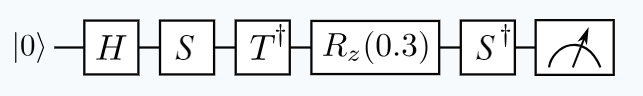

In [ ]:
""" ------ Codercise I.5.3 -> The S and T Gates ------ """

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def many_rotations():
    """Implement the circuit depicted above and return the quantum state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT
    qml.Hadamard(0)
    qml.S(0)
    qml.adjoint(qml.T)(0)
    qml.RZ(0.3, 0)
    qml.adjoint(qml.S)(0)



    # RETURN THE STATE

    return qml.state()

# 3. From a Different Angle

I learned from this part is,
* The description the action of the RX gate and its matrix representation.
* Can describe the action of the RY gate and its matrix representation.
* Representation qubit states in 3-dimensional space using the Bloch sphere.

In [ ]:
""" ------ Codercise I.6.1 -> Applying RX ------ """

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_rx_pi(state):
    """Apply an RX gate with an angle of \pi to a particular basis state.

    Args:
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RX(pi) AND RETURN THE STATE
    qml.RX(np.pi, 0)

    return qml.state()


print(apply_rx_pi(0))
print(apply_rx_pi(1))

[6.123234e-17+0.j 0.000000e+00-1.j]
[0.000000e+00-1.j 6.123234e-17+0.j]


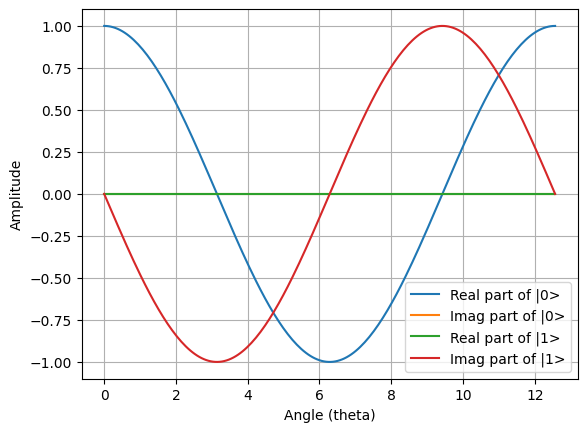

In [11]:
""" ------ Codercise I.6.2 -> Plotting RX ------ """

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_rx(theta, state):
    """Apply an RX gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RX(theta) AND RETURN THE STATE
    qml.RX(theta, 0)

    return qml.state()


# Code for plotting
angles = np.linspace(0, 4 * np.pi, 200)
output_states = np.array([apply_rx(t, 0) for t in angles])


def plotter(angles, output_states):
    plt.plot(angles, np.real(output_states[:, 0]), label='Real part of |0>')
    plt.plot(angles, np.imag(output_states[:, 0]), label='Imag part of |0>')
    plt.plot(angles, np.real(output_states[:, 1]), label='Real part of |1>')
    plt.plot(angles, np.imag(output_states[:, 1]), label='Imag part of |1>')
    plt.grid()
    plt.xlabel('Angle (theta)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

plot = plotter(angles, output_states)


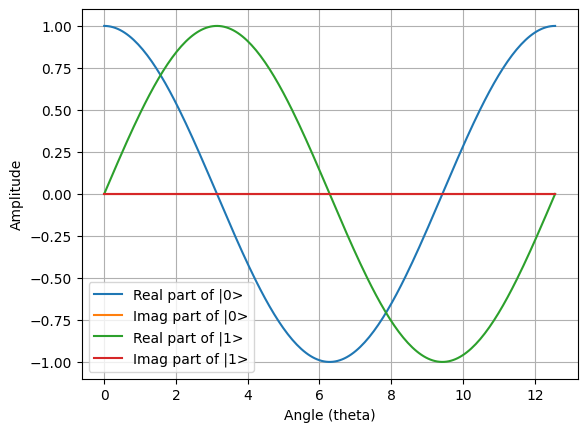

In [12]:
""" ------ Codercise I.6.2 -> Plotting RY ------ """

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_ry(theta, state):
    """Apply an RY gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RY(theta) AND RETURN THE STATE
    qml.RY(theta, 0)

    return qml.state()


# Code for plotting
angles = np.linspace(0, 4 * np.pi, 200)
output_states = np.array([apply_ry(t, 0) for t in angles])

def plotter(angles, output_states):
    plt.plot(angles, np.real(output_states[:, 0]), label='Real part of |0>')
    plt.plot(angles, np.imag(output_states[:, 0]), label='Imag part of |0>')
    plt.plot(angles, np.real(output_states[:, 1]), label='Real part of |1>')
    plt.plot(angles, np.imag(output_states[:, 1]), label='Imag part of |1>')
    plt.grid()
    plt.xlabel('Angle (theta)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

plot = plotter(angles, output_states)

# 4. Universal Gate Sets

* I can define what it means for a gate set to be universal for quantum computing.
* I can state two universal gate sets for single-qubit quantum computation.

In [ ]:
""" ------ Codercise I.7.1 -> Universality of Rotations ------ """

dev = qml.device("default.qubit", wires=1)

##################
# YOUR CODE HERE #
##################

# ADJUST THE VALUES OF PHI, THETA, AND OMEGA
phi, theta, omega = np.pi/2, np.pi/2, np.pi/2


@qml.qnode(dev)
def hadamard_with_rz_rx():
    qml.RZ(phi, wires=0)
    qml.RX(theta, wires=0)
    qml.RZ(omega, wires=0)
    return qml.state()

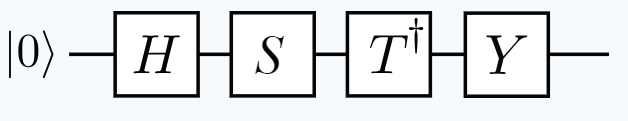

In [ ]:
""" ------ Codercise I.7.2 -> Synthesizing a Circuit ------ """

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def convert_to_rz_rx():
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT IN THE PICTURE USING ONLY RZ AND RX
    qml.RZ(np.pi/2, 0)
    qml.RX(np.pi/2, 0)
    qml.RZ(7*np.pi/4, 0)
    qml.RX(np.pi, 0)

    return qml.state()

In [ ]:
""" ------ Codercise I.7.3 -> Universality of H and T ------ """

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def unitary_with_h_and_t():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY ONLY H AND T TO PRODUCE A CIRCUIT THAT EFFECTS THE GIVEN MATRIX
    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.Hadamard(wires=0)

    return qml.state()

# 5. Prepare Yourself

* I can use this as a reference for all I have learned.
* I can combine gates to prepare specific quantum states.

In [ ]:
""" ------ Codercise I.8.1 -> State Preparation ------ """

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE
    qml.Hadamard(wires=0)
    qml.RZ(5 * np.pi / 4, wires=0)

    return qml.state()

In [ ]:
""" ------ Codercise I.8.2 -> State Preparation Revisited ------ """

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE
    qml.RX(np.pi/3 , wires=0)


    return qml.state()

In [ ]:
""" ------ Codercise I.8.3 -> State Preparation with Mottonen's Method ------ """

v = np.array([0.52889389 - 0.14956775j, 0.67262317 + 0.49545818j])

##################
# YOUR CODE HERE #
##################

# CREATE A DEVICE
dev=qml.device("default.qubit",wires=1)
@qml.qnode(dev)

# CONSTRUCT A QNODE THAT USES qml.MottonenStatePreparation
# TO PREPARE A QUBIT IN STATE V, AND RETURN THE STATE


def prepare_state(state=v):
    qml.MottonenStatePreparation(v,wires=range(1))

    return qml.state()


# This will draw the quantum circuit and allow you to inspect the output gates
print(prepare_state(v))
print()
print(qml.draw(prepare_state, expansion_strategy="device")(v))

[0.52889389-0.14956775j 0.67262317+0.49545818j]

0: ──RY(1.98)──RZ(0.91)──GlobalPhase(-0.18)─┤  State


# 6. Measurements

I have learned throughout the practice are,
* How to define a projective measurement.
* Performing a projective measurement in the computational basis.
* How to perform measurements in an alternative measurement basis.

In [ ]:
""" ------ Codercise I.9.1 -> Measuring a SuperPosition ------ """

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_h_and_measure(state):
    """Complete the function such that we apply the Hadamard gate
    and measure in the computational basis.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise leave it in state 0.

    Returns:
        np.array[float]: The measurement outcome probabilities.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY HADAMARD AND MEASURE
    qml.Hadamard(0)


    return qml.probs(wires=0)


print(apply_h_and_measure(0))
print(apply_h_and_measure(1))

[0.5 0.5]
[0.5 0.5]


In [ ]:
""" ------ Codercise I.9.2 -> Y Basis Rotation ------ """

# WRITE A QUANTUM FUNCTION THAT PREPARES (1/2)|0> + i(sqrt(3)/2)|1>
def prepare_psi():
    qml.RX(-2*np.pi/3,wires=0)
    pass


# WRITE A QUANTUM FUNCTION THAT SENDS BOTH |0> TO |y_+> and |1> TO |y_->
def y_basis_rotation():
    qml.Hadamard(wires=0)
    qml.S(wires=0)
    pass

In [ ]:
""" ------ Codercise I.9.3 -> Measurement in the Y Basis ------ """

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def measure_in_y_basis():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE THE STATE
    prepare_psi()

    # PERFORM THE ROTATION BACK TO COMPUTATIONAL BASIS
    qml.adjoint(y_basis_rotation)()

    # RETURN THE MEASUREMENT OUTCOME PROBABILITIES

    return qml.probs(0)


print(measure_in_y_basis())

[0.9330127 0.0669873]


# 7. What did you expect?

* Defining an observable, and compute its possible measurement outcomes.
* Can compute the expectation value of an observable.

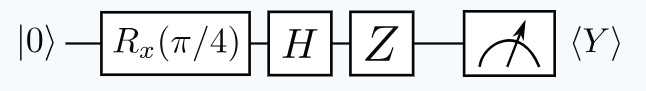

In [ ]:
""" ------ Codercise I.10.1 -> Measurement of the Pauli Y observable ------ """

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def circuit():
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT IN THE PICTURE AND MEASURE PAULI Y
    qml.RX(np.pi/4, 0)
    qml.Hadamard(0)
    qml.PauliZ(0)

    return qml.expval(qml.PauliY(0))


print(circuit())


-0.7071067811865471


In [ ]:
""" ------ Codercise I.10.2 -> Setting of the Number of Experiment Shots ------ """

# An array to store your results
shot_results = []

# Different numbers of shots
shot_values = [100, 1000, 10000, 100000, 1000000]

for shots in shot_values:
    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A DEVICE, CREATE A QNODE, AND RUN IT
    dev = qml.device("default.qubit", wires=1)


    @qml.qnode(dev)
    def circuit():
        qml.RX(np.pi/4,wires=0)
        qml.Hadamard(wires=0)
        qml.PauliZ(wires=0)
        return qml.expval(qml.PauliY(0))


    # STORE RESULT IN SHOT_RESULTS ARRAY
    shot_results.append(circuit())

print(qml.math.unwrap(shot_results))

[-0.7071067811865471, -0.7071067811865471, -0.7071067811865471, -0.7071067811865471, -0.7071067811865471]


In [ ]:
""" ------ Codercise I.10.3 -> Evaluating the Samples ------ """

dev = qml.device("default.qubit", wires=1, shots=100000)


@qml.qnode(dev)
def circuit():
    qml.RX(np.pi / 4, wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # RETURN THE MEASUREMENT SAMPLES OF THE CORRECT OBSERVABLE

    return qml.sample(qml.PauliY(wires=0))


def compute_expval_from_samples(samples):
    """Compute the expectation value of an observable given a set of
    sample outputs. You can assume that there are two possible outcomes,
    1 and -1.

    Args:
        samples (np.array[float]): 100000 samples representing the results of
            running the above circuit.

    Returns:
        float: the expectation value computed based on samples.
    """
    number_of_ones = np.count_nonzero(samples == 1)
    number_of_minus_ones = np.count_nonzero(samples == -1)

    estimated_expval = (number_of_ones - number_of_minus_ones) / len(samples)

    ##################
    # YOUR CODE HERE #
    ##################

    # USE THE SAMPLES TO ESTIMATE THE EXPECTATION VALUE

    return estimated_expval


samples = circuit()
print(compute_expval_from_samples(samples))


-0.70616


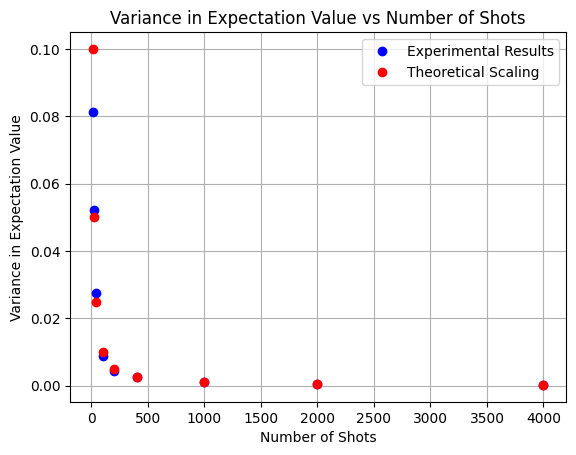

In [19]:
""" ------ Codercise I.10.4 -> The Variance of Smaple Measurements ------ """

def variance_experiment(n_shots):
    """Run an experiment to determine the variance in an expectation
    value computed with a given number of shots.

    Args:
        n_shots (int): The number of shots

    Returns:
        float: The variance in expectation value we obtain running the
        circuit 100 times with n_shots shots each.
    """

    # To obtain a variance, we run the circuit multiple times at each shot value.
    n_trials = 100

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A DEVICE WITH GIVEN NUMBER OF SHOTS
    dev = qml.device("default.qubit", wires=1, shots=n_shots)

    # DECORATE THE CIRCUIT BELOW TO CREATE A QNODE
    @qml.qnode(dev)

    def circuit():
        qml.Hadamard(wires=0)
        return qml.expval(qml.PauliZ(wires=0))

    # RUN THE QNODE N_TRIALS TIMES AND RETURN THE VARIANCE OF THE RESULTS
    results = [circuit() for _ in range(n_trials)]


    return np.var(results)


def variance_scaling(n_shots):
    """Once you have determined how the variance in expectation value scales
    with the number of shots, complete this function to programmatically
    represent the relationship.

    Args:
        n_shots (int): The number of shots

    Returns:
        float: The variance in expectation value we expect to see when we run
        an experiment with n_shots shots.
    """

    estimated_variance = 1 / n_shots

    ##################
    # YOUR CODE HERE #
    ##################

    # ESTIMATE THE VARIANCE BASED ON SHOT NUMBER

    return estimated_variance


# Various numbers of shots; you can change this
shot_vals = [10, 20, 40, 100, 200, 400, 1000, 2000, 4000]

def plotter(shot_vals, results_experiment, results_scaling):
    plt.plot(shot_vals, results_experiment, 'bo', label='Experimental Results')
    plt.plot(shot_vals, results_scaling, 'ro', label='Theoretical Scaling')
    plt.grid()
    plt.xlabel('Number of Shots')
    plt.ylabel('Variance in Expectation Value')
    plt.title('Variance in Expectation Value vs Number of Shots')
    plt.legend()
    plt.show()

# Used to plot your results
results_experiment = [variance_experiment(shots) for shots in shot_vals]
results_scaling = [variance_scaling(shots) for shots in shot_vals]
plot = plotter(shot_vals, results_experiment, results_scaling)

# **Circuits With Many Qubits**

# 1. Multi Qubit Systems

* I can construct the state of a multi-qubit system using the tensor product.
* I can define and apply separable operations to multiple qubits.

In [ ]:
""" ------ Codercise I.11.1 -> Preparing Basis State ------ """

num_wires = 3
dev = qml.device("default.qubit", wires=num_wires)


@qml.qnode(dev)
def make_basis_state(basis_id):
    """Produce the 3-qubit basis state corresponding to |basis_id>.

    Note that the system starts in |000>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        np.array[complex]: The computational basis state |basis_id>.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE THE BASIS STATE
    binary_str = np.binary_repr(basis_id, num_wires)
    basis_state = [int(i) for i in binary_str]
    qml.BasisState(basis_state, wires=range(num_wires))
    return qml.state()

    return qml.state()


basis_id = 3
print(f"Output state = {make_basis_state(basis_id)}")

Output state = [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [ ]:
""" ------ Codercise I.11.2 -> Separables Operations ------ """

# Creates a device with *two* qubits
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def two_qubit_circuit():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE |+>|1>
    qml.Hadamard(0)
    qml.PauliX(1)

    # RETURN TWO EXPECTATION VALUES, Y ON FIRST QUBIT, Z ON SECOND QUBIT

    return qml.expval(qml.PauliY(0)), qml.expval(qml.PauliZ(1))


print(two_qubit_circuit())

(tensor(0., requires_grad=True), tensor(-1., requires_grad=True))


In [ ]:
""" ------ Codercise I.11.3 -> Expactation Value of Two-Qubit Observable ------ """

dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def create_one_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE |1>|->
    qml.PauliX(0)
    qml.PauliX(1)
    qml.Hadamard(1)

    # RETURN A SINGLE EXPECTATION VALUE Z \otimes X

    return qml.expval(qml.PauliZ(0) @ qml.PauliX(1))


print(create_one_minus())

0.9999999999999996


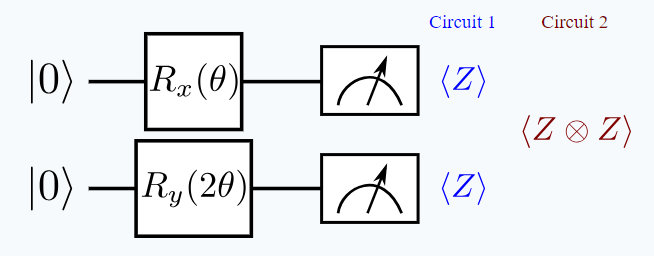

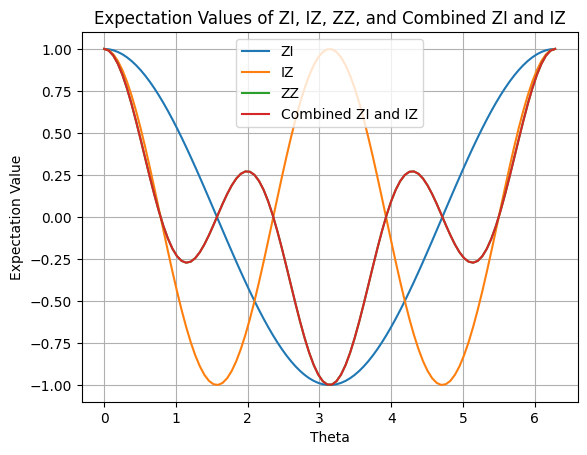

In [21]:
""" ------ Codercise I.11.4 -> Double Trouble ------ """

dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def circuit_1(theta):
    """Implement the circuit and measure Z I and I Z.

    Args:
        theta (float): a rotation angle.

    Returns:
        float, float: The expectation values of the observables Z I, and I Z
    """
    ##################
    # YOUR CODE HERE #
    ##################
    qml.RX(theta, 0)
    qml.RY(2 * theta, 1)

    return (qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1)))


@qml.qnode(dev)
def circuit_2(theta):
    """Implement the circuit and measure Z Z.

    Args:
        theta (float): a rotation angle.

    Returns:
        float: The expectation value of the observable Z Z
    """

    ##################
    # YOUR CODE HERE #
    ##################
    qml.RX(theta, 0)
    qml.RY(2 * theta, 1)


    return qml.expval(qml.PauliZ(0)@qml.PauliZ(1))



def zi_iz_combination(ZI_results, IZ_results):
    """Implement a function that acts on the ZI and IZ results to
    produce the ZZ results. How do you think they should combine?

    Args:
        ZI_results (np.array[float]): Results from the expectation value of
            ZI in circuit_1.
        IZ_results (np.array[float]): Results from the expectation value of
            IZ in circuit_2.

    Returns:
        np.array[float]: A combination of ZI_results and IZ_results that
        produces results equivalent to measuring ZZ.
    """

    combined_results = ZI_results * IZ_results

    ##################
    # YOUR CODE HERE #
    ##################

    return combined_results


theta = np.linspace(0, 2 * np.pi, 100)

# Run circuit 1, and process the results
circuit_1_results = np.array([circuit_1(t) for t in theta])

ZI_results = circuit_1_results[:, 0]
IZ_results = circuit_1_results[:, 1]
combined_results = zi_iz_combination(ZI_results, IZ_results)

# Run circuit 2
ZZ_results = np.array([circuit_2(t) for t in theta])

def plotter(theta, ZI_results, IZ_results, ZZ_results, combined_results):
    plt.plot(theta, ZI_results, label='ZI')
    plt.plot(theta, IZ_results, label='IZ')
    plt.plot(theta, ZZ_results, label='ZZ')
    plt.plot(theta, combined_results, label='Combined ZI and IZ')
    plt.xlabel('Theta')
    plt.ylabel('Expectation Value')
    plt.title('Expectation Values of ZI, IZ, ZZ, and Combined ZI and IZ')
    plt.grid()
    plt.legend()
    plt.show()

# Plot your results
plot = plotter(theta, ZI_results, IZ_results, ZZ_results, combined_results)

# 2. All Tied Up

* I can define and apply entangling operations to multi-qubit systems.
* How to define the controlled-NOT (CNOT) gate, and write it's matrix representation.
* How to define and apply general controlled operations.

In [ ]:
""" ------ Codercise I.12.1 -> Entangling Operations ------ """

num_wires = 2
dev = qml.device("default.qubit", wires=num_wires)


@qml.qnode(dev)
def apply_cnot(basis_id):
    """Apply a CNOT to |basis_id>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        np.array[complex]: The resulting state after applying CNOT|basis_id>.
    """

    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    qml.BasisStatePreparation(bits, wires=[0, 1])

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE CNOT
    qml.CNOT(wires=[0, 1])

    return qml.state()


##################
# YOUR CODE HERE #
##################

# REPLACE THE BIT STRINGS VALUES BELOW WITH THE CORRECT ONES
cnot_truth_table = {"00": "00", "01": "01", "10": "11", "11": "10"}


# Run your QNode with various inputs to help fill in your truth table
print(apply_cnot(0))

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [ ]:
""" ------ Codercise I.12.2 -> Separable or Entangled ------ """

dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def apply_h_cnot():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE OPERATIONS IN THE CIRCUIT
    qml.Hadamard(0)
    qml.CNOT(wires=[0,1])

    return qml.state()


print(apply_h_cnot())

##################
# YOUR CODE HERE #
##################

# SET THIS AS 'separable' OR 'entangled' BASED ON YOUR OUTCOME
state_status = "entangled"

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


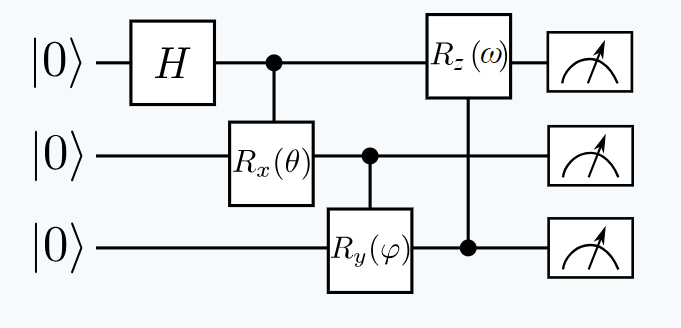

In [ ]:
""" ------ Codercise I.12.3 -> Controlled Rotations ------ """

dev = qml.device("default.qubit", wires=3)


@qml.qnode(dev)
def controlled_rotations(theta, phi, omega):
    """Implement the circuit above and return measurement outcome probabilities.

    Args:
        theta (float): A rotation angle
        phi (float): A rotation angle
        omega (float): A rotation angle

    Returns:
        np.array[float]: Measurement outcome probabilities of the 3-qubit
        computational basis states.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE OPERATIONS IN THE CIRCUIT AND RETURN MEASUREMENT PROBABILITIES
    qml.Hadamard(0)
    qml.CRX(theta, wires=[0,1])
    qml.CRY(phi, wires=[1,2])
    qml.CRZ(omega, wires=[2,0])

    return qml.probs([0,1,2])


theta, phi, omega = 0.1, 0.2, 0.3
print(controlled_rotations(theta, phi, omega))

[5.00000000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.98751041e-01 0.00000000e+00 1.23651067e-03 1.24480103e-05]


# We've got it Under Control

* How to define and apply a set of common multi-qubit operations: the controlled-Z, Toffoli, and SWAP gates.
* I can express common 3-qubit operations in terms of 1- and 2-qubit operations.

In [8]:
""" ------ Codercise I.13.1 -> The Imposter CZ ------ """

dev = qml.device("default.qubit", wires=2)

# Prepare a two-qubit state; change up the angles if you like
phi, theta, omega = 1.2, 2.3, 3.4


@qml.qnode(device=dev)
def true_cz(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE REGULAR CZ GATE HERE
    qml.CZ(wires=[0,1])

    return qml.state()


@qml.qnode(dev)
def imposter_cz(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT CZ USING ONLY H AND CNOT
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    qml.Hadamard(wires=1)

    return qml.state()


print(f"True CZ output state {true_cz(phi, theta, omega)}")
print(f"Imposter CZ output state {imposter_cz(phi, theta, omega)}")


True CZ output state [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
Imposter CZ output state [1.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [6]:
""" ------ Codercise I.13.2 -> The SWAP Gate ------ """

dev = qml.device("default.qubit", wires=2)

# Prepare a two-qubit state; change up the angles if you like
phi, theta, omega = 1.2, 2.3, 3.4

def prepare_states(phi, theta, omega):
    pass


@qml.qnode(dev)
def apply_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE REGULAR SWAP GATE HERE
    qml.SWAP(wires=[0,1])

    return qml.state()


@qml.qnode(dev)
def apply_swap_with_cnots(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE SWAP GATE USING A SEQUENCE OF CNOTS
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,0])
    qml.CNOT(wires=[0,1])

    return qml.state()


print(f"Regular SWAP state = {apply_swap(phi, theta, omega)}")
print(f"CNOT SWAP state = {apply_swap_with_cnots(phi, theta, omega)}")

Regular SWAP state = [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
CNOT SWAP state = [1.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [7]:
""" ------ Codercise I.13.3 -> The Toffoli Gate ------ """

dev = qml.device("default.qubit", wires=3)

# Prepare first qubit in |1>, and arbitrary states on the second two qubits
phi, theta, omega = 1.2, 2.3, 3.4

def prepare_states(phi, theta, omega):
    pass


# A helper function just so you can visualize the initial state
# before the controlled SWAP occurs.
@qml.qnode(dev)
def no_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)
    return qml.state()


@qml.qnode(dev)
def controlled_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################

    # PERFORM A CONTROLLED SWAP USING A SEQUENCE OF TOFFOLIS
    qml.Toffoli(wires=[0, 1, 2])
    qml.Toffoli(wires=[0, 2, 1])
    qml.Toffoli(wires=[0, 1, 2])

    return qml.state()


print(no_swap(phi, theta, omega))
print(controlled_swap(phi, theta, omega))

[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


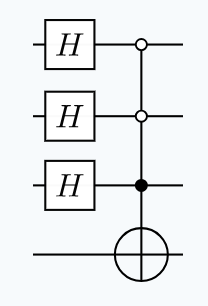

In [ ]:
""" ------ Codercise I.13.4 -> Mixed Controlled Gates ------ """

dev = qml.device("default.qubit", wires=4)


@qml.qnode(dev)
def four_qubit_mcx():
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT ABOVE USING A 4-QUBIT MULTI-CONTROLLED X
    qml.Hadamard(0)
    qml.Hadamard(1)
    qml.Hadamard(2)
    qml.MultiControlledX(control_wires=[0, 1, 2], wires=3, control_values="001")

    return qml.state()


print(four_qubit_mcx())


[0.35355339+0.j 0.        +0.j 0.        +0.j 0.35355339+0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j]


/usr/local/lib/python3.10/dist-packages/pennylane/ops/op_math/controlled_ops.py:1071: PennyLaneDeprecationWarning: Specifying control values using a bitstring is deprecated, and will not be supported in future releases, Use a list of booleans or integers instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pennylane/ops/op_math/controlled_ops.py:1077: UserWarning: The control_wires keyword for MultiControlledX is deprecated, and will be removed soon. Use wires = (*control_wires, target_wire) instead.
  warnings.warn(


In [ ]:
""" ------ Codercise I.13.5 -> The 3-Controlled-Not ------ """

# Wires 0, 1, 2 are the control qubits
# Wire 3 is the auxiliary qubit
# Wire 4 is the target
dev = qml.device("default.qubit", wires=5)


@qml.qnode(dev)
def four_qubit_mcx_only_tofs():
    # We will initialize the control qubits in state |1> so you can see
    # how the output state gets changed.
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    qml.PauliX(wires=2)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT A 3-CONTROLLED NOT WITH TOFFOLIS
    qml.Toffoli(wires=[0, 1, 3])
    qml.Toffoli(wires=[2, 3, 4])
    qml.Toffoli(wires=[0, 1, 3])

    return qml.state()


# print(four_qubit_mcx_only_tofs())

# Multi-Qubit Gate Challenge

* I can use this as a reference for all your single- and multi-qubit gate needs!
* How to prepare two-qubit states by combinaning single- and two-qubit gates.

In [ ]:
""" ------ Codercise I.14.1 -> The Bell States ------ """

dev = qml.device("default.qubit", wires=2)

# Starting from the state |00>, implement a PennyLane circuit
# to construct each of the Bell basis states.


@qml.qnode(dev)
def prepare_psi_plus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE (1/sqrt(2)) (|00> + |11>)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])

    return qml.state()


@qml.qnode(dev)
def prepare_psi_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE (1/sqrt(2)) (|00> - |11>)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.PauliZ(wires=1)

    return qml.state()


@qml.qnode(dev)
def prepare_phi_plus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE  (1/sqrt(2)) (|01> + |10>)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.PauliX(wires=0)

    return qml.state()


@qml.qnode(dev)
def prepare_phi_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE  (1/sqrt(2)) (|01> - |10>)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.PauliZ(wires=1)
    qml.PauliX(wires=1)

    return qml.state()


psi_plus = prepare_psi_plus()
psi_minus = prepare_psi_minus()
phi_plus = prepare_phi_plus()
phi_minus = prepare_phi_minus()

# Uncomment to print results
# print(f"|ψ_+> = {psi_plus}")
# print(f"|ψ_-> = {psi_minus}")
# print(f"|ϕ_+> = {phi_plus}")
# print(f"|ϕ_-> = {phi_minus}")

In [ ]:
""" ------ Codercise I.14.2 -> Quantum Multiplexer ------ """

dev = qml.device("default.qubit", wires=3)

# State of first 2 qubits
state = [0, 1]


@qml.qnode(device=dev)
def apply_control_sequence(state):
    # Set up initial state of the first two qubits
    if state[0] == 1:
        qml.PauliX(wires=0)
    if state[1] == 1:
        qml.PauliX(wires=1)

    # Set up initial state of the third qubit - use |->
    # so we can see the effect on the output
    qml.PauliX(wires=2)
    qml.Hadamard(wires=2)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE MULTIPLEXER
    # IF STATE OF FIRST TWO QUBITS IS 01, APPLY X TO THIRD QUBIT
    qml.PauliX(0)
    qml.Toffoli(wires=[0,1,2])
    qml.PauliX(0)

    # IF STATE OF FIRST TWO QUBITS IS 10, APPLY Z TO THIRD QUBIT
    qml.PauliX(1)
    qml.Hadamard(2)
    qml.Toffoli(wires=[0,1,2])
    qml.Hadamard(2)
    qml.PauliX(1)

    # IF STATE OF FIRST TWO QUBITS IS 11, APPLY Y TO THIRD QUBIT
    qml.adjoint(qml.S)(wires=2)
    qml.Toffoli(wires=[0, 1, 2])
    qml.S(2)


    return qml.state()


print(apply_control_sequence(state))

[ 0.        +0.j  0.        +0.j -0.70710678+0.j  0.70710678+0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
